# Exploratory Data Analysis: EDA For Categorical Data

In EDA, our goal is to summarize the main characteristics of the data by exposing *trends, patterns*, and *relationships* that may not be apparent at first glance. This is typically done by employing effective *data visualization techniques*. <br>
When the data contains categorical features, EDA is somewhat simpler. Fewer options equals more simplicity!!  <br>
As long as we can conduct the EDA effectively, we will be able to derive valuable insights on how best to manipulate data sources to get the answers we need.

## The Data

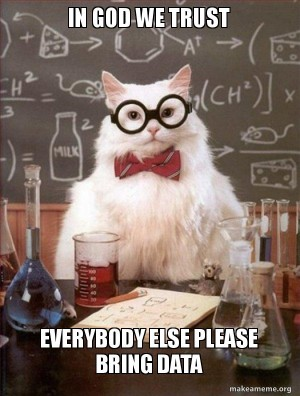

*Here goes the DATA!* <br>
The data we will be using is the __[Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/car+evaluation)__ . This data was derived from a simple hierarchical decision model. <br>
We will do some EDA and note our learnings about the data.

Let’s import the data and take a glimpse at the dataset.

In [1]:
#Lets import the required libraries to perform our tasks
import pandas as pd

import numpy as np; np.random.seed(0)

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

In [2]:
#Lets import the data which is already uploaded to the root folder
cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv("car.data", names=cols)


In [3]:
#Lets observe the data we imported
print(car_data.info())
car_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Data has 1728 entries/rows/records. <br>
Data has 7 attributes/ columns.<br>
Data Type of each attributes is 'object'. This shows our data is *categorical* data.<br>
There are no missing or NaN or Null values. 

This model evaluates cars according to the following concept structure: <br>

* **CAR:** car acceptability <br>
* **PRICE:** overall price <br>
  → `buying` buying price: <mark style="background-color: #DFFFFF">vhigh, high, med, low</mark>   <br>
  → `maint` price of the maintenance: <mark style="background-color: #DFFFFF">vhigh, high, med, low </mark>   <br>
* **TECH:** technical characteristics <br>
* **COMFORT:** comfort <br>
  → `doors` number of doors: <mark style="background-color: #DFFFFF">2, 3, 4, 5more </mark>   <br>
  → `persons` capacity in terms of persons to carry: <mark style="background-color: #DFFFFF">2, 4, more</mark>    <br>
  → `lug_boot` the size of luggage boot:<mark style="background-color: #DFFFFF"> small, med, big</mark>    <br>
  → `safety` estimated safety of the car:<mark style="background-color: #DFFFFF"> low, med, high</mark>  

## Why are we digging the data?

It’s important to know what you’re trying to predict. In our case, we want to predict a *car’s acceptability* —  determine if they’re acceptable. We will also find out other attributes that impact the car acceptance.
In our dataset it is the `class` attribute that determines the car's acceptance. So this is our target variable/label/attribute.

We must classify the cars class from four categories: `unacc, acc, good, vgood`. This is a **multiclass classification problem.** 
<br>
All of this information can be taken from the documentation about the data.

We observe that the data has 1728 observations with 6 attributes, all with *no missing values*. <br>

The first thing we want to think about is the type of categorical data do we have. Is it *nominal or ordinal?* 

A nominal categorical feature would have no intrinsic order to its categories. Ordinal categorical features have an intrinsic ordering to their categories. <br>

All of the attributes may be considered to be categorical, but our focus is on buying, maint, lug_boot, and safety.
It makes sense to rank low, medium, and high as 3, 2, 1. <br>

The target label also seems to be ordinal. We can assume the values mean unacceptable (`unaac`), acceptable (`acc`), good (`good`), very good (`vgood`). <br>

Let’s inspect these features more…

### Plotting the features

We can start by inspecting the target label.

In [4]:
import matplotlib.pyplot as plt

classnames = car_data['class'].value_counts().keys()
print (classnames)
classcounts = car_data['class'].value_counts().values
print (classcounts)
classcountspct = car_data['class'].value_counts(normalize=True).values*100
print (classcountspct)

Index(['unacc', 'acc', 'good', 'vgood'], dtype='object')
[1210  384   69   65]
[70.02314815 22.22222222  3.99305556  3.76157407]


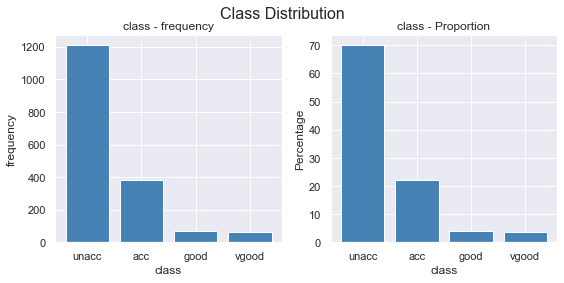

In [5]:
fig, ax = plt.subplots(1,2, figsize=(8,4), squeeze=False)
# Draw first subplot - counts
ax[0, 0].bar(x=classnames, height=classcounts, color='steelblue')
ax[0, 0].set_title("class - frequency")
ax[0, 0].set_xlabel("class")
ax[0, 0].set_ylabel("frequency")
# Draw second subplot - proportion
ax[0, 1].bar(x=classnames, height=classcountspct, color='steelblue')
ax[0, 1].set_title("class - Proportion")
ax[0, 1].set_xlabel("class")
ax[0, 1].set_ylabel("Percentage")

fig.suptitle('Class Distribution' , fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

The above plot demonstrates the univariate analysis of our target attribute `class`. <br>
From this analysis on the `class` feature, we see that there are majority of the cars that were deemed `unacc`. <br>
Let’s plot the other variables to understand their distributions.

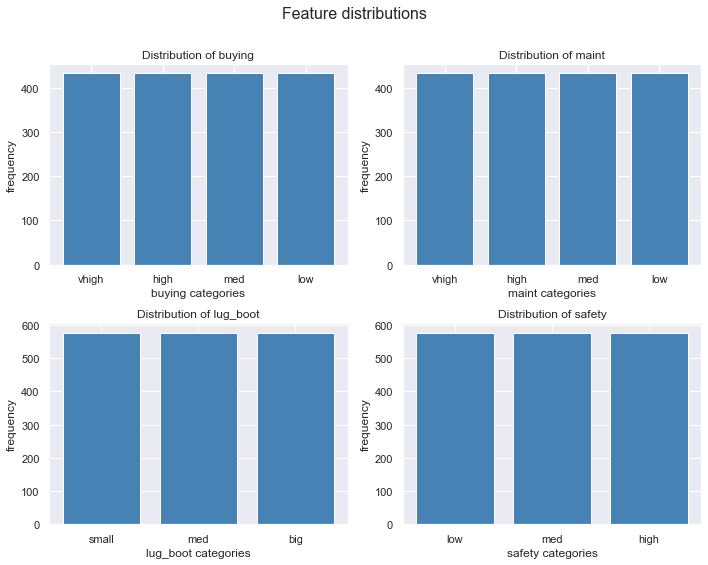

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0, 0].bar(    
    x=car_data["buying"].value_counts().keys(),
    height=car_data["buying"].value_counts().values,
    color='steelblue')
ax[0, 0].set_title("Distribution of buying")
ax[0, 0].set_xlabel("buying categories")
ax[0, 0].set_ylabel("frequency")
ax[0, 1].bar(    
    x=car_data["maint"].value_counts().keys(),
    height=car_data["maint"].value_counts().values,
    color='steelblue'
    )
ax[0, 1].set_title("Distribution of maint")
ax[0, 1].set_xlabel("maint categories")
ax[0, 1].set_ylabel("frequency")
ax[1, 0].bar(
    x=car_data["lug_boot"].value_counts().keys(),
    height=car_data["lug_boot"].value_counts().values,
    color='steelblue'
    )
ax[1, 0].set_title("Distribution of lug_boot")
ax[1, 0].set_xlabel("lug_boot categories")
ax[1, 0].set_ylabel("frequency")
ax[1, 1].bar(
    x=car_data["safety"].value_counts().keys(),
    height=car_data["safety"].value_counts().values,
    color='steelblue'
    )
ax[1, 1].set_title("Distribution of safety")
ax[1, 1].set_xlabel("safety categories")
ax[1, 1].set_ylabel("frequency")
fig.suptitle("Feature distributions", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

We observe that each feature has an equal number of observations per value. <br>
But it doesn’t really tell us much about the data we have.<br>

One way to get a better insight into our data is with frequency tables (a.k.a contingency tables).

### Frequency tables

The goal is to investigate how individual features are distributed. We also want to understand how features interact with one another such that we end up with a certain target label.

For example, we may want to understand how the buying price affects the final decision on the cars. Below is a utility function to help us create our frequency table.

In [7]:
#Two way frequency table using crosstab() for class and buying price

buying_freq_table = pd.crosstab(index=car_data['class'], columns=car_data['buying'], margins=True)
buying_prop_table = round(buying_freq_table/buying_freq_table.loc["All"], 2)

print("class X buying : frequency table")
print()
print(buying_freq_table)
print()
print("---" * 16)
print()
print("class X buying : relative frequency table (as %)")
print()
print(buying_prop_table)

class X buying : frequency table

buying  high  low  med  vhigh   All
class                              
acc      108   89  115     72   384
good       0   46   23      0    69
unacc    324  258  268    360  1210
vgood      0   39   26      0    65
All      432  432  432    432  1728

------------------------------------------------

class X buying : relative frequency table (as %)

buying  high   low   med  vhigh   All
class                                
acc     0.25  0.21  0.27   0.17  0.22
good    0.00  0.11  0.05   0.00  0.04
unacc   0.75  0.60  0.62   0.83  0.70
vgood   0.00  0.09  0.06   0.00  0.04
All     1.00  1.00  1.00   1.00  1.00


The top table of standard two-way frequency tells us the counts of each buying value by the output class. 
Below one is a relative frequency table that tells us the relative (percentage) frequencies instead of counts.

This data answers our questions “what percentage of `high` value cars are `acceptable`?" 

We infer: <br>
“``0.25`` (25%) of cars with a `high` buying price were `acc` (acceptable) and <br>
`0.75` (75%) of cars with a `high` buying price were `unacc` (unacceptable).<br>
On the higher side,<br> `0.83` (83%) of cars with a `vhigh` buying price were `unacc` (unacceptable).<br> Just `0.17` (17%) of cars with a `vhigh` buying price were `acc` (acceptable). <br>
Even on the lower buying price we see the same story:<br> `0.60` (60%) of cars with a `low` buying price were `unacc` (unacceptable).<br> Just `0.21` (21%) of cars with a `low` buying price were `acc` (acceptable). 
”
<br><br>
It's a valuable information!

If a car has a `vhigh` buying price then it’s more likely it will be `unacc` compared to a car with a `low` buying price. This is because a car was `unacc` 83% of the time when the buying price was `vhigh`, but only 60% when the buying price was `low`.

We will now perform the same exercise with other attributes.

In [8]:
#Two way frequency table using crosstab() for class and maint
#Here using the .div method we have divided the data by the sum of the rows to retrieve the row relative frequency.

maint_freq_table = pd.crosstab(index=car_data['class'], columns=car_data['maint'], margins=True)
maint_prop_table = round(maint_freq_table.div(maint_freq_table["All"], axis=0), 2)

print("class X maint : frequency table")
print()
print(maint_freq_table)
print()
print("---" * 16)
print()
print("class X maint : relative frequency table (as %)")
print()
print(maint_prop_table)

class X maint : frequency table

maint  high  low  med  vhigh   All
class                             
acc     105   92  115     72   384
good      0   46   23      0    69
unacc   314  268  268    360  1210
vgood    13   26   26      0    65
All     432  432  432    432  1728

------------------------------------------------

class X maint : relative frequency table (as %)

maint  high   low   med  vhigh  All
class                              
acc    0.27  0.24  0.30   0.19  1.0
good   0.00  0.67  0.33   0.00  1.0
unacc  0.26  0.22  0.22   0.30  1.0
vgood  0.20  0.40  0.40   0.00  1.0
All    0.25  0.25  0.25   0.25  1.0


This data answers our question “what percentage of `good` cars have `low` maintenance?" <br>
To answer this we navigate to the row that says good and in the column that says low we take the value 0.67 which is **67%**.

Another way we can say this is 46 of 69 `good` cars were `low` maintenance; We can also say a car that is `good` is more likely to be of low maintenance than a car that was `unacc`.

Now we will find the answer to question “Irrespective of the buying price, what is the probability of the car being vgood?” 

In [9]:
#Using the marginal distribution for class
print(car_data['class'].value_counts())
print('--' *15)
print(car_data['class'].value_counts(normalize=True)*100)

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
------------------------------
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: class, dtype: float64


The answer is "Irrespective of the buying price, the probability of the car being `vgood` is just **3.76%**" <br>
while "Irrespective of the buying price, the probability of the car being `unacc` is as high as **70%**"

### Conditional Probability

The conditional probability defines the probability of one event occurring given that another event has occurred. <br>
With this concept, we will find answer to the question “how do the conditional distributions of `unacc` cars differ for `low safety` cars and `high safety` cars?"

In [10]:
#Two way frequency table using crosstab() for class and buying price

safety_freq_table = pd.crosstab(index=car_data['class'], columns=car_data['safety'], margins=True)
safety_prop_table = round(safety_freq_table.div(safety_freq_table["All"], axis=0), 2)

print("class X safety : frequency table")
print()
print(safety_freq_table)
print()
print("---" * 16)
print()
print("class X safety : relative frequency table (as %)")
print()
print(safety_prop_table)

class X safety : frequency table

safety  high  low  med   All
class                       
acc      204    0  180   384
good      30    0   39    69
unacc    277  576  357  1210
vgood     65    0    0    65
All      576  576  576  1728

------------------------------------------------

class X safety : relative frequency table (as %)

safety  high   low   med  All
class                        
acc     0.53  0.00  0.47  1.0
good    0.43  0.00  0.57  1.0
unacc   0.23  0.48  0.30  1.0
vgood   1.00  0.00  0.00  1.0
All     0.33  0.33  0.33  1.0


Using our two-way table above: <br>
we infer that only `0.23` (23%) of `high safety` cars are `unacc` (unacceptable) and `0.53` (53%) of `high safety` cars are `acc` (acceptable)..<br>
while `0.48` (48%) of `low safety` cars are `unacc` (unacceptable). <br>
This gives us more insight into our data by showing us exactly how categories are broken up.

This is all about **Exploratory Data Analysis.** <br>
*Thanks for reading.*